# Hierarchical Agglomerative Clustering
### Hierarchical Agglomerative Clustering (HAC) is a type of clustering algorithm used to group similar objects into clusters. 
In HAC, each object starts as its own cluster and then these clusters are merged into larger clusters in a "bottom-up" manner until all objects belong to a single cluster or until a stopping criterion is met.

### Real World Use Cases
HAC has many real world use cases, including:

**Customer Segmentation**: HAC can be used to segment customers based on their demographic information, purchase history, and other related data to target them with personalized marketing campaigns.

**Image Segmentation**: HAC can be used to segment images into different regions, for example, separating foreground from background in an image.

**Document Clustering**: HAC can be used to group documents into topics or categories based on their content and similarity.

**Social Network Analysis**: HAC can be used to analyze social networks to identify communities or groups of individuals with similar interests or relationships.

**Market Basket Analysis**: HAC can be used to analyze market basket data to identify items that are frequently purchased together and to make recommendations to customers.

## Notebook Breakdown:
This notebook contains two analyses for which HAC was used. 

The **first analysis** is intended to review core HAC concepts and apply them on artifical data. The **second analysis** is much more detailed as it brings in real-world consumer data for which HAC is used for Customer Segmentation. 

## First Analysis - Reviewing Core Concepts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.patches as mpatches
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Create a random array which will be used for Hierarchicial Agglomerative Clustering 

In [2]:
np.random.seed(10)
X = np.random.rand(50,2)

Plot the points generated in the array in order to visualize them. 
    The goal is to cluster these using different hierarchical agglomerative clustering techniques.

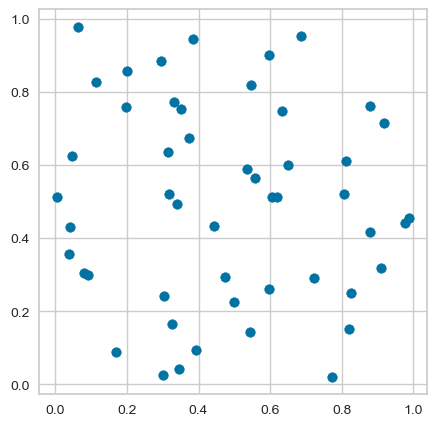

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], label = 'True Position')
    
plt.show()

First cluster technique used, **Single Linkage**: merges two clusters if they have the closest pair of elements. 

Inspecting the dendrogram helps us determine the optimal number of clusters to use. We note that the longest vertical line (largest distance) on the right-most part of the visual at roughly between 0.125 and 0.135. This spot is highlighted by the dashed red line. We note that there are *10 clusters* at this point for the Single Linkage method. 

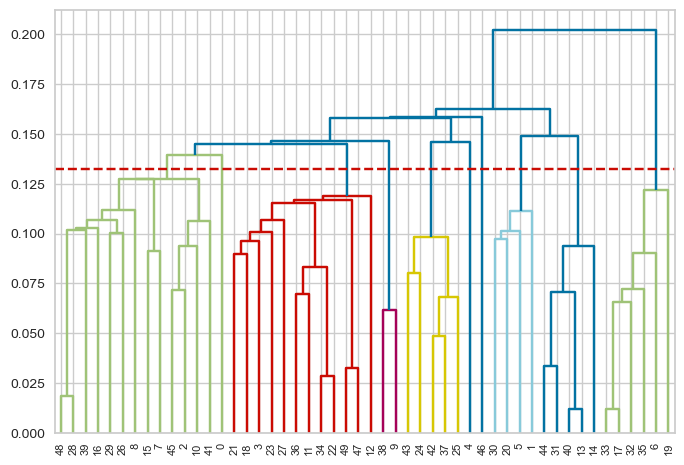

In [4]:
linked_s = linkage(X, 'single')
labels = range(1,100)

dendrogram(linked_s, orientation = 'top', distance_sort = 'descending')
plt.axhline(y=0.1325, color='r', linestyle='--')

plt.show()

Second cluster technique used, **Complete Linkage**: merges two clusters if they have the farthest pair of elements. 

Inspecting the dendrogram helps us determine the optimal number of clusters to use. We note that the longest vertical line (largest distance) on the right-most part of the visual at roughly around 0.415. This spot is highlighted by the dashed red line. We note that there are *9 clusters* at this point for the Complete Linkage method.

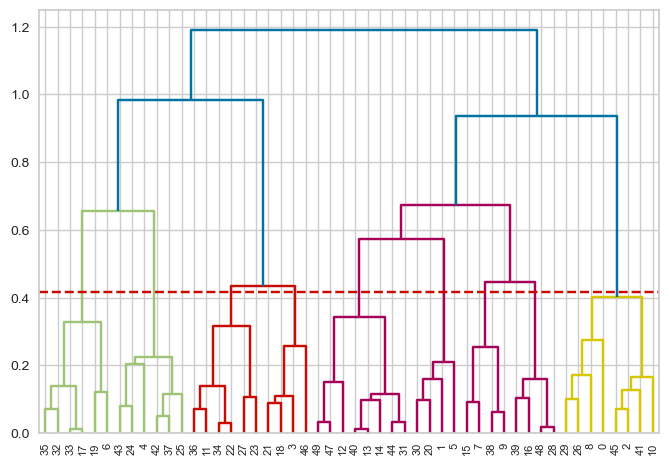

In [5]:
linked_c = linkage(X, 'complete')
labels = range(1,100)

dendrogram(linked_c, orientation = 'top', distance_sort = 'descending', show_leaf_counts = True)
plt.axhline(y=0.415, color = 'r', linestyle = '--')

plt.show()

Third cluster technique used, **Average Linkage**: merges two clusters based on the average pairwise distance between elements in the two clusters. 

Inspecting the dendrogram helps us determine the optimal number of clusters to use. We note that the longest vertical line (largest distance) is in the middle of the visual around 0.325. This spot is highlighted by the dashed red line. We note that there are *7 clusters* at this point for the Average Linkage method.

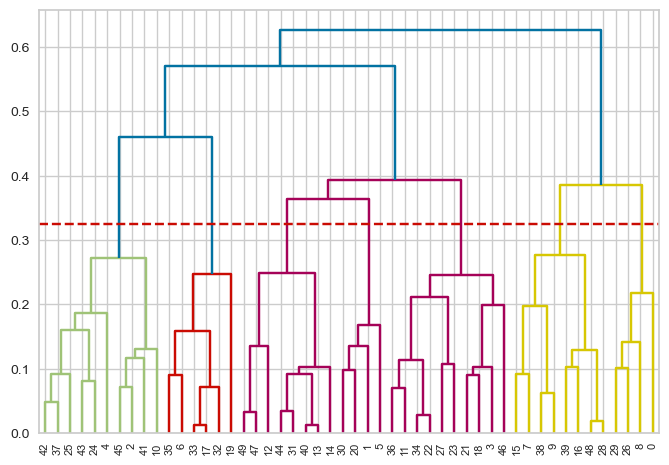

In [6]:
linked_a = linkage(X, 'average')
labels = range(1,100)

dendrogram(linked_a, orientation = 'top', distance_sort = 'descending', show_leaf_counts = True)
plt.axhline(y=0.325, color='r', linestyle='--')

plt.show()

Fourth cluster technique used, **Ward Linkage**: minimizes the variance of the distances between the merged cluster and all other points. 

Inspecting the dendrogram helps us determine the optimal number of clusters to use. We note that the longest vertical line (largest distance) is in the middle of the visual around 0.6. This spot is highlighted by the dashed red line. We note that there are *7 clusters* at this point for the Ward Linkage method.

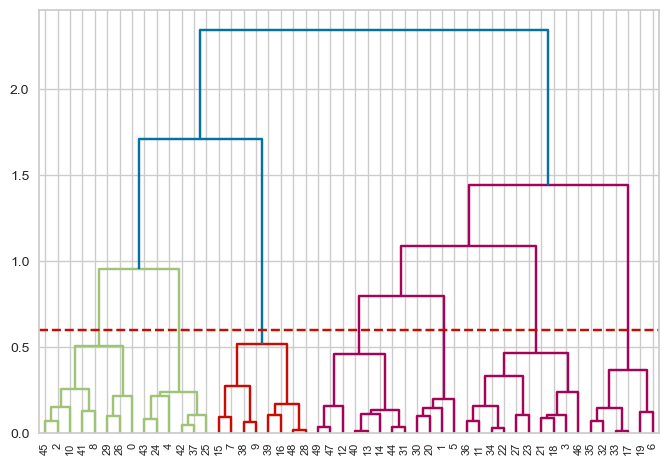

In [7]:
linked_w = linkage(X, 'ward')
labels = range(1,100)

dendrogram(linked_w, orientation = 'top', distance_sort = 'descending', show_leaf_counts = True)
plt.axhline(y=0.6, color = 'r', linestyle='--')

plt.show()

**Grouping the clusters** using the cluster sizes calculated above.

In [8]:
cluster_s = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='single')
print('Single Cluster:', cluster_s.fit_predict(X), '\n')

cluster_c = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='complete')
print('Complete Cluster:', cluster_c.fit_predict(X), '\n')

cluster_a = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
print('Average Cluster:', cluster_a.fit_predict(X), '\n')

cluster_w = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
print('Ward Cluster:', cluster_w.fit_predict(X))

Single Cluster: [9 4 0 3 5 4 1 0 0 6 0 3 3 2 2 0 0 1 3 1 4 3 3 3 8 8 0 3 0 0 4 2 1 1 3 1 3
 8 6 0 2 0 8 8 2 0 7 3 0 3] 

Complete Cluster: [0 6 0 8 5 6 4 2 0 2 0 3 1 1 1 2 7 4 8 4 6 8 3 3 5 5 0 3 7 0 6 1 4 4 3 4 3
 5 2 7 1 0 5 5 1 0 8 1 7 1] 

Average Cluster: [5 6 2 4 2 6 3 0 5 0 2 4 1 1 1 0 0 3 4 3 6 4 4 4 2 2 5 4 0 5 6 1 3 3 4 3 4
 2 0 0 1 2 2 2 1 2 4 1 0 1] 

Ward Cluster: [1 6 1 4 5 6 3 0 1 0 1 4 2 2 2 0 0 3 4 3 6 4 4 4 5 5 1 4 0 1 6 2 3 3 4 3 4
 5 0 0 2 1 5 5 2 1 4 2 0 2]


**Plotting the clusters** using color-coded points to highlight each cluster. 

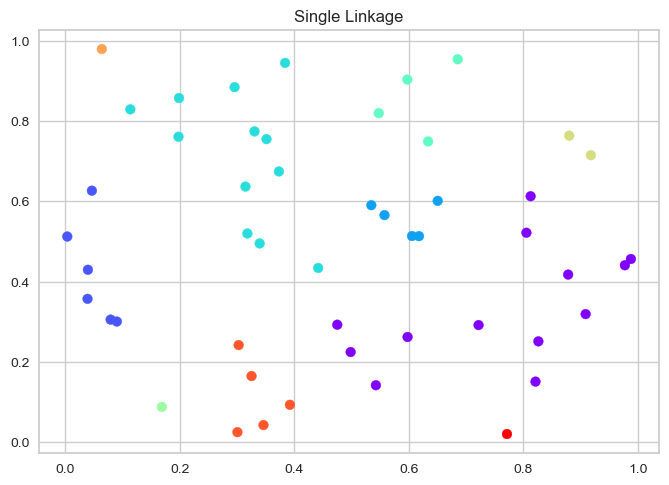

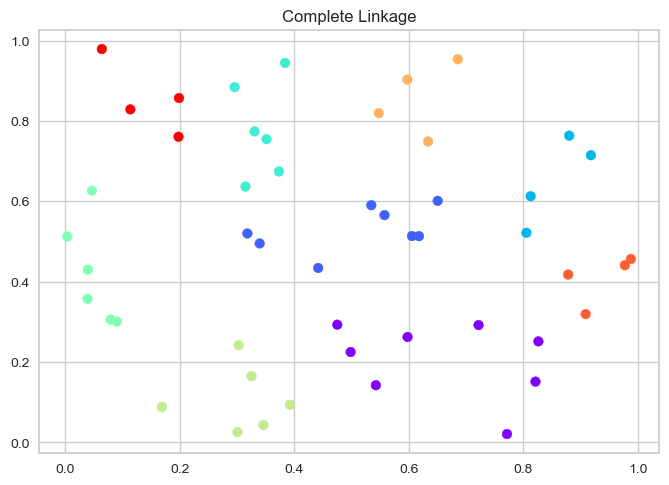

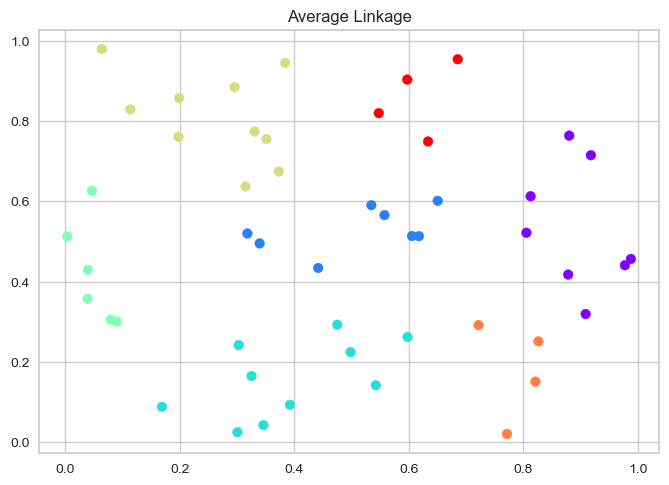

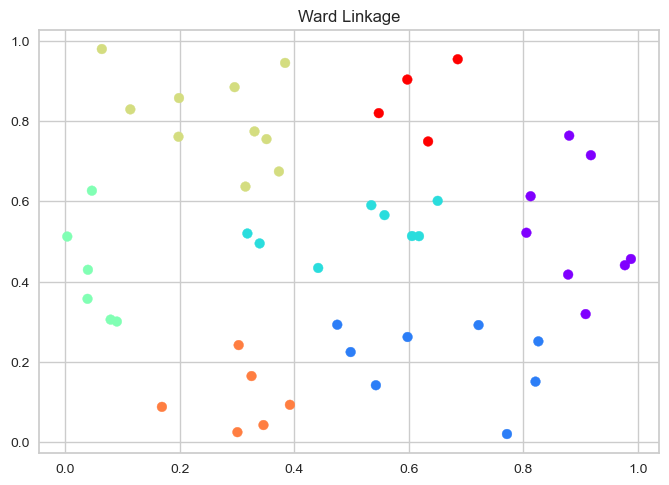

In [9]:
plt.figsize = (2,2)
plt.scatter(X[:,0], X[:,1], c = cluster_s.labels_, cmap='rainbow')

##Below is code to show the cluster names in the plot legend if desired. 
##Given these clusters correspond to a created array and are not from real-world data, 
##the legend is currently hidden as there is no additional benefit to showing cluster names.

# clusters_s = set(cluster_s.labels_)
# colors = [plt.cm.rainbow(i) for i in np.linspace(0, 1, len(clusters_s))]
# legend_handles = [mpatches.Patch(color=colors[i], label=f"Cluster {cluster}") for i, cluster in enumerate(clusters_s)]
# plt.legend(handles=legend_handles, loc="upper right")
plt.title('Single Linkage')
plt.show()

plt.scatter(X[:,0], X[:,1], c = cluster_c.labels_, cmap='rainbow')
plt.title('Complete Linkage')
plt.show()

plt.scatter(X[:,0], X[:,1], c = cluster_a.labels_, cmap='rainbow')
plt.title('Average Linkage')
plt.show()

plt.scatter(X[:,0], X[:,1], c = cluster_w.labels_, cmap='rainbow')
plt.title('Ward Linkage')
plt.show()

## Second Analysis: Customer Segmentation via HAC
Below is an analysis completed on real-world consumer data which was used to segment customers based on various characteristics. 

In [10]:
data = pd.read_csv("marketing_campaign.csv", sep='\t')

In [11]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

A few interesting things to note upon inspecting the information below:
1) There are a few object type variables that will be needed to converted into numeric form
2) There is a date (Dt_Customer) that is currently in object form
3) There are Missing values for Income

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Cleaning the data for analysis

In [13]:
#Removing NA values - this should result in 2216 rows with complete data
data = data.dropna()
print(data.count())

ID                     2216
Year_Birth             2216
Education              2216
Marital_Status         2216
Income                 2216
Kidhome                2216
Teenhome               2216
Dt_Customer            2216
Recency                2216
MntWines               2216
MntFruits              2216
MntMeatProducts        2216
MntFishProducts        2216
MntSweetProducts       2216
MntGoldProds           2216
NumDealsPurchases      2216
NumWebPurchases        2216
NumCatalogPurchases    2216
NumStorePurchases      2216
NumWebVisitsMonth      2216
AcceptedCmp3           2216
AcceptedCmp4           2216
AcceptedCmp5           2216
AcceptedCmp1           2216
AcceptedCmp2           2216
Complain               2216
Z_CostContact          2216
Z_Revenue              2216
Response               2216
dtype: int64


In [14]:
#Updating the Dt_Customer column to date format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
print('Dt_Customer updated datatype:', data['Dt_Customer'].dtype)

Dt_Customer updated datatype: datetime64[ns]


With the date type updated, we can now use this new variable to calculate the number of days a customer has been in the system.

In [15]:
#Create a new list to pull date from datetime data type.
dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)

#Calculate the number of days a customer is in the system, with 
#the latest date as newest (day 0).
days = []
d1 = max(dates) 
for i in dates:
    delta = d1 - i
    days.append(delta)
data['Customer_For'] = days
data['Customer_For'] = pd.to_numeric(data['Customer_For'], errors = 'coerce')

Next, we can turn our attention to the categorical variables to better understand how to convert them into numeric values. 

We can start by understanding the category counts for each variable.

In [16]:
print('Marital Status:\n', data['Marital_Status'].value_counts())
print('\nEducation:\n', data['Education'].value_counts())

Marital Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


Now using the gathered information on the above categories + other variable information at hand, we can create a few new, more useful, variables.

In [17]:
#Use the marrital status variable to create a new
#variable to understand if one is living alone or with a partner

data['Living_With_Adults'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Single':'Alone', 'Divorced':'Alone', 'Widow':'Alone', 'Absurd':'Alone', 'YOLO':'Alone'})
data['Adults'] = data['Living_With_Adults'].replace({'Alone':1, 'Partner':2})

#Calculating the number of children at home
data['Children'] = data['Kidhome'] + data['Teenhome']

#Merging the above 2 pieces of info (partner + children) to calculate the 
#total family size
data["Family_Size"] = data['Adults'] + data["Children"]

#Create a new variable indicating whether one is a parent or not
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

#Create a new variable to identify the age of the customer
data['Age'] = 2023 - data['Year_Birth']

#Calculate the total amount the customer spends on various items
data['Spent'] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

#Simplify education segment such that it's only in 3 groups
data['Education'] = data['Education'].replace({'Graduation':'Graduate', 'PhD':'Postgrad', 'Master':'Postgrad', '2n Cycle':'Undergraduate', 'Basic':'Undergraduate'})

#Drop the unnecessary columns
data.drop(columns=['Living_With_Adults', 'Adults', 'Children', 'Marital_Status', 'Dt_Customer', 'Year_Birth', 'ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

### Visualizing the data to betterunderstand it

<Figure size 800x550 with 0 Axes>

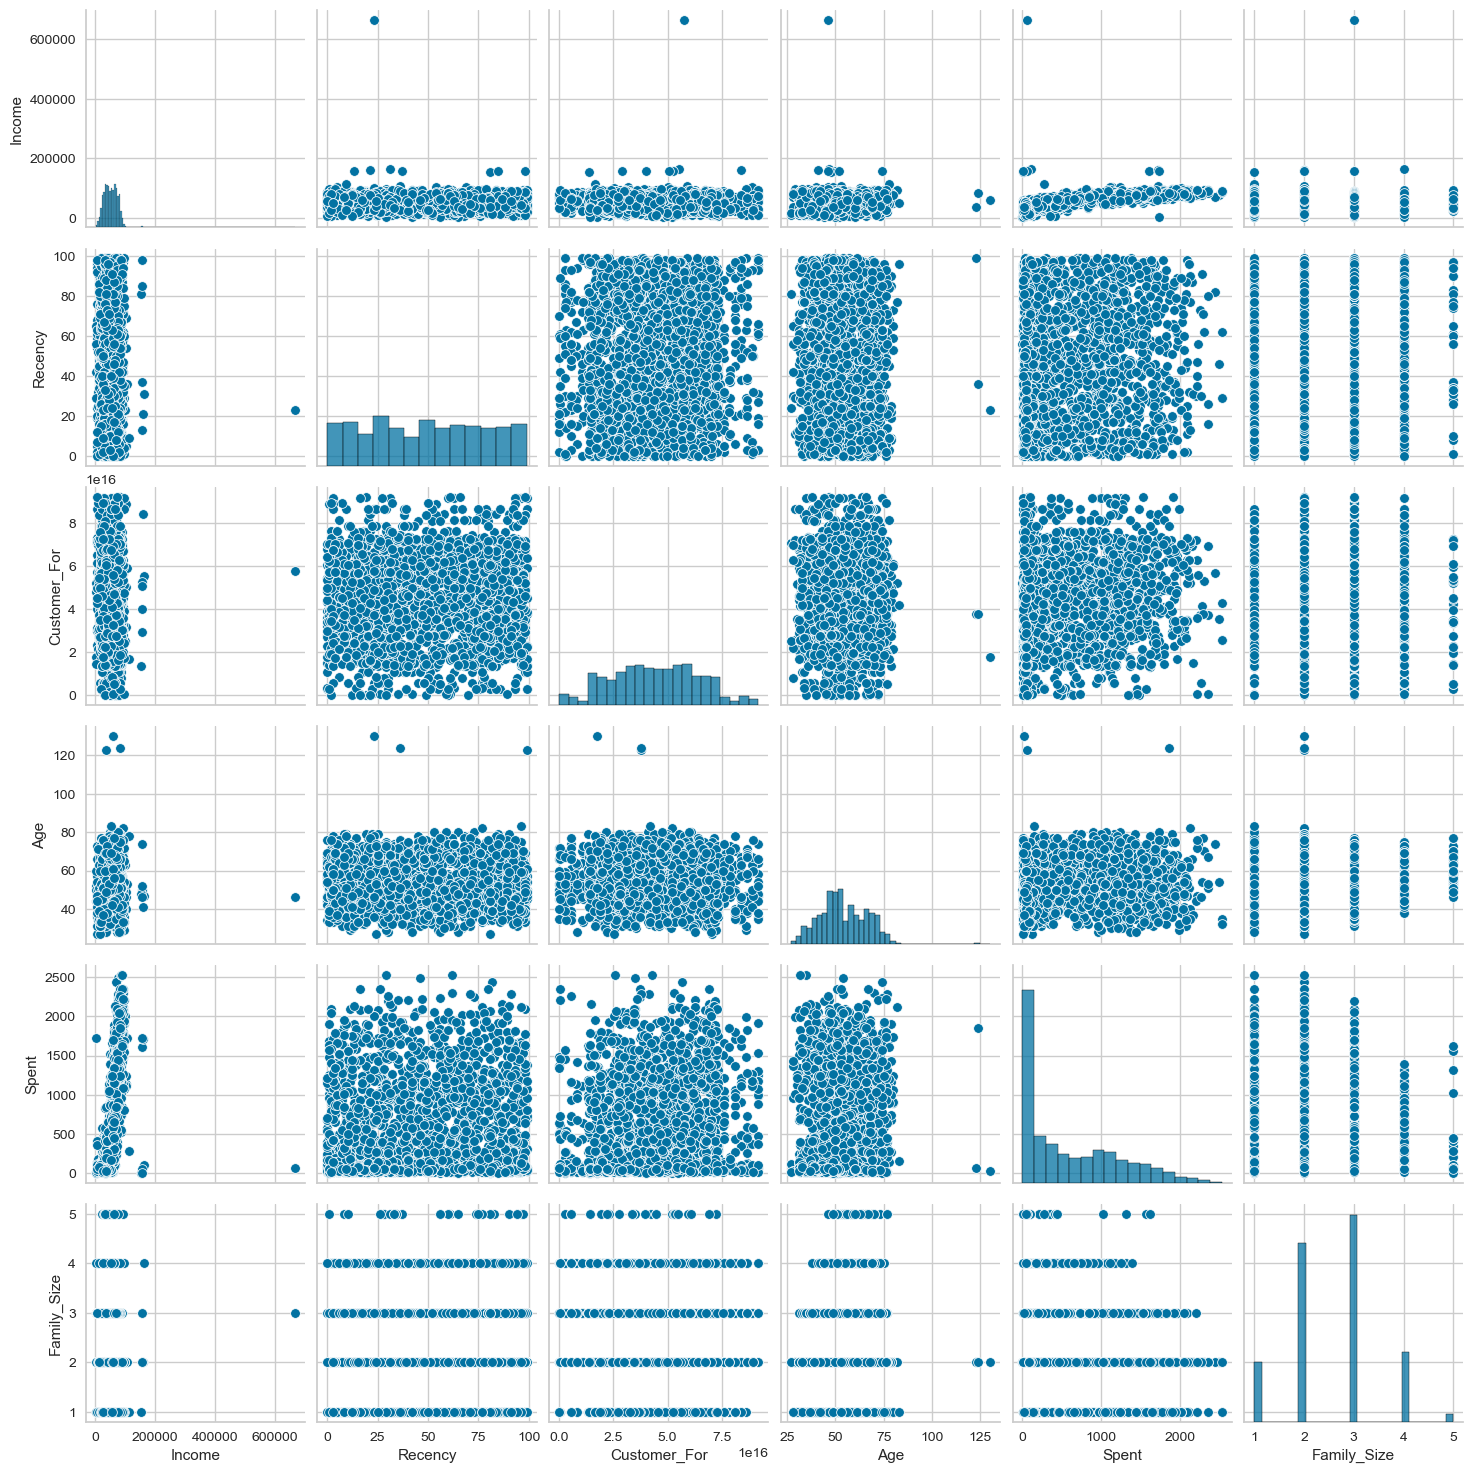

In [18]:
Plot = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Family_Size']
plt.figure()
sns.pairplot(data[Plot])
plt.show()

Reviewing the visuals shows us there are **clear outliers** in age and income which should be addressed.

In [19]:
data = data[(data['Age'] < 90)]
data = data[(data['Income'] < 600000)]

print('Remaining customers:', len(data))

Remaining customers: 2212


Having cleaned up the data and added a few new useful variables, we can now **create a correlation matrix** to view the correlation between the variables.

The correlation heatmap below shows us what is expected. For example, variables that directly contributed to "Spent" are stronly correlated with "Spent" whereas "Is_Parent" is strongly correlated with family size.

<AxesSubplot:>

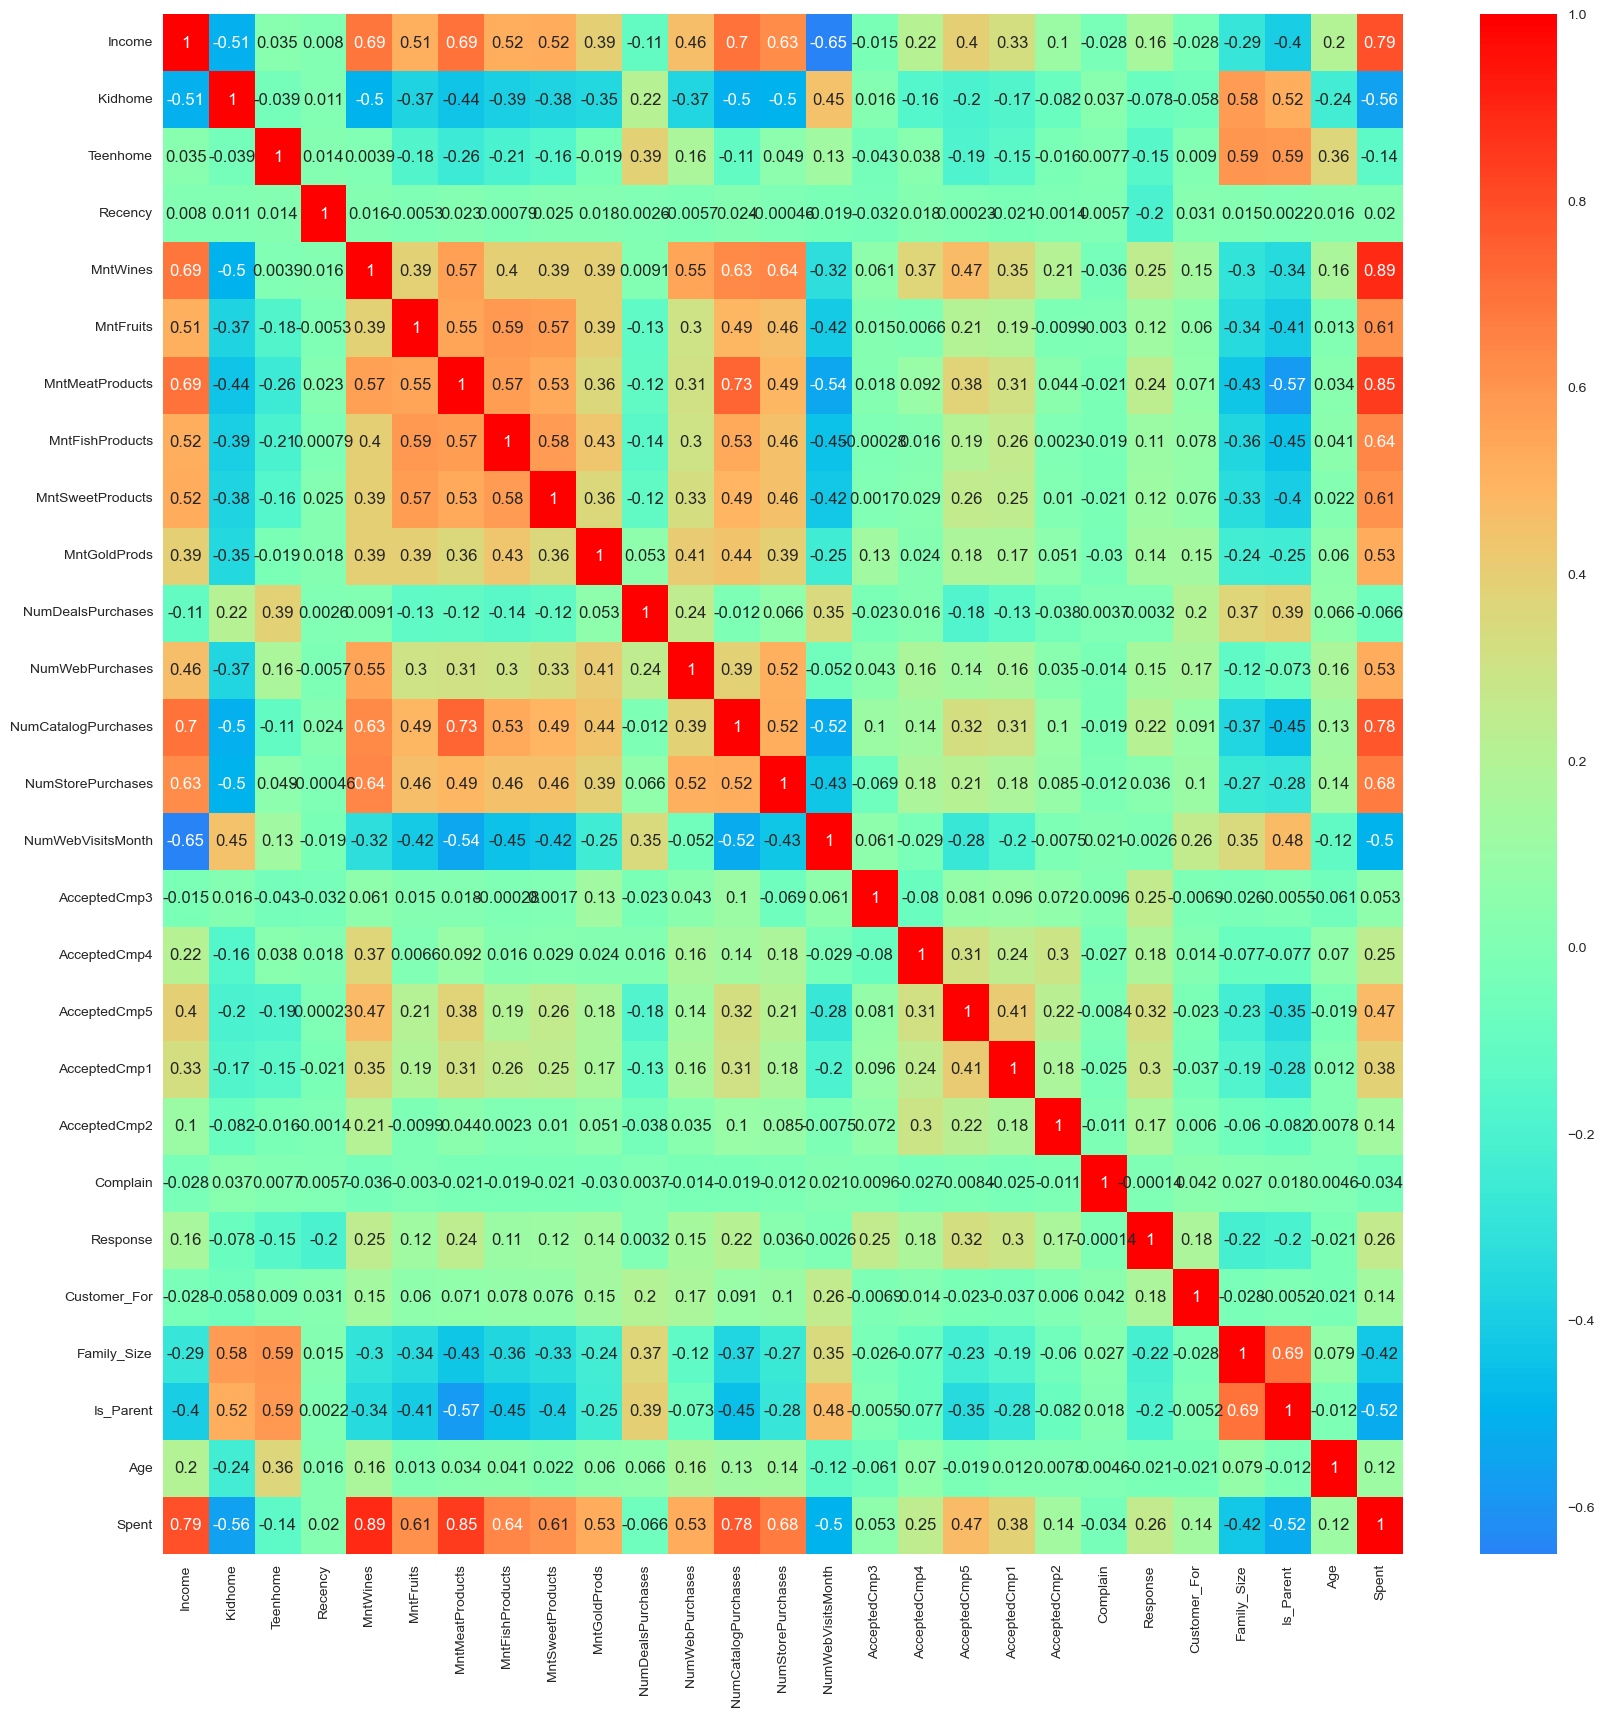

In [20]:
corrmatrix = data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corrmatrix, annot=True, cmap='rainbow', center=0)

Having reviewed the numeric variables, let us now shift our attention to the categorical variables. We need to **convert them to numeric variables** in order to use them for our statistical model.

In [21]:
#Identifying a list of categorical variables
cat = (data.dtypes == 'object')
object_columns = list(cat[cat].index)

print('Categorical variables:', object_columns)

#We can use LabelEncoder() from SK Learn to encode categorical variables
#as numerical values.
encoder = LabelEncoder()
for i in object_columns:
    data[i]=data[[i]].apply(encoder.fit_transform)

Categorical variables: ['Education']


Next up is **scaling our variables**. This is important as it helps ensure that no variable in the model has a disproportionate effect on the final results due to its scale. It also helps with addressing issues such as skewed distributions, unequal variances, and large outlier impact (which we have already addressed for Income and Age).

There are various methods to scaling variables including normalization, standardization, and Min-Max scaling. We will use standardization for our scaling.

In [22]:
#Start by creating a copy of our data frame
datacopy = data.copy()

#Delete columns that don't need to be scaled
datacopy.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'], axis=1)

#Scale the remaining variables

scaler = StandardScaler()
scaler.fit(datacopy)
scaled_data = pd.DataFrame(scaler.transform(datacopy),columns=datacopy.columns)
    
scaled_data.head()

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618  -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257   0.419540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp5  \
0         1.690293         2.453472          1.483713  ...     -0.280175   
1        -0.718230        -0.651004         -0.634019  ...     -0.280175   
2        -0.178542         1.339513         -0.147184  ...     -0.280175   
3        -0.655787        -0.504911         -0.585335  ...     -0.280175   
4        -0.218684         0.152508         -0.001133  ...     -0.280175   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Customer_For  Family_Size  \
0     -0.261914     -0.117256  -0.09552  2.375425      1.973583    -1.758359   
1     -0.261914     -0.117256  -0.09552 -0.420977     -1.665144     0.449070   
2     -0.261914     -0.117256  -0.09552 -0.420977     -0.172664    -0.654644   
3     -0.261914     -0.117256  -0.09552 -0.420977     -1.923210     0.449070   
4     -0.261914     -0.117256  -0.09552 -0.420977     -0.822130     0.449070   

   Is_Parent       Age     Spent  
0  -1.581139  1.018352  1.676245  
1   0.632456  1.274785 -0.963297  
2  -1.581139  0.334530  0.280110  
3   0.632456 -1.289547 -0.920135  
4   0.632456 -1.033114 -0.307562  

[5 rows x 28 columns]

Now we are ready to use our dataframe for modeling!

### Dimensionality Reduction:
Dimensionality reduction is the process of reducing the number of features or variables in a dataset while preserving as much of the information content as possible. This is often done in statistical modeling to remove irrelevant or redundant features, reduce noise in the data, improve the interpretability of the model, or to speed up the training time of machine learning algorithms.

There are a few different methods that can be used such as principal component analysis (PCA), linear discriminant analysis (LDA), and t-distribution stochastic neghbor embedding (t-SNE).

We will use PCA here: technique used to transform a set of correlated variables into a set of linearly uncorrelated variables called principal components.

In [23]:
#Apply PCA to reduce components to 3
pca = PCA(n_components = 3)

#Fitting the PCA model on the scaled data. The model is trained on the
#scaled data to find the eigenvectors and eigenvalues of the covariane matrix (used
#to calculate the principal components)
pca.fit(scaled_data)

#Transforming the scaled data into a set of principal components and stores 
#into a dataframe.
PCA_data = pd.DataFrame(pca.transform(scaled_data), columns=(['var1', 'var2', 'var3']))

PCA_data.head()

var1      var2      var3
0  4.719534 -0.053942  0.058071
1 -2.711823 -0.126269 -0.552979
2  2.111964 -0.594447 -1.147715
3 -2.826951 -1.535894 -0.054185
4 -0.761030  0.088784 -0.644106

We can visualize the new dataframe we have created. Our goal is to cluster these data points.

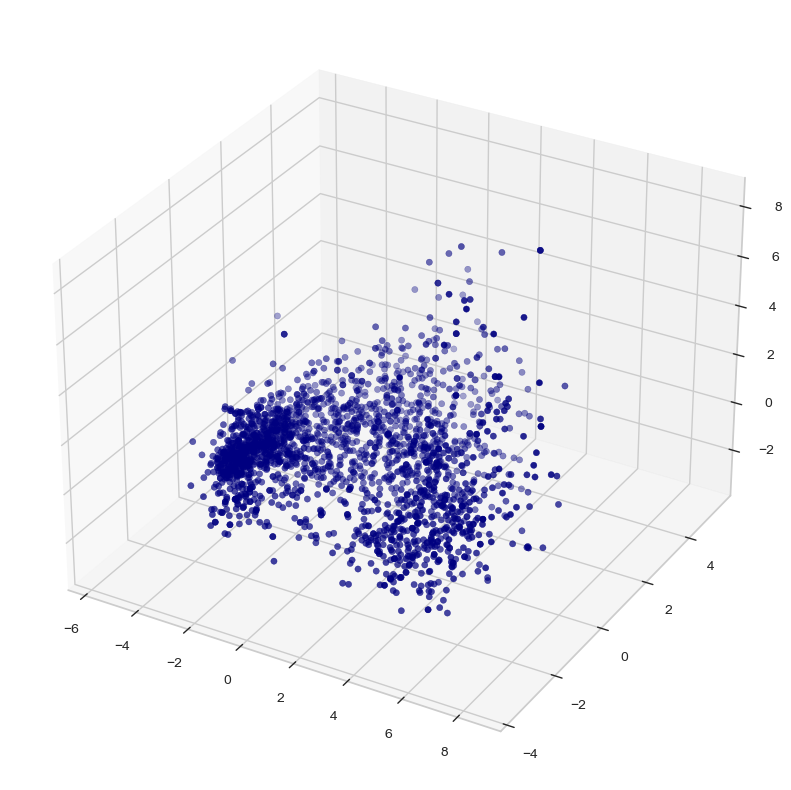

In [24]:
x = PCA_data['var1']
y = PCA_data['var2']
z = PCA_data['var3']

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c='navy', marker="o" )
plt.show()

### Great! Now we can finally move onto the fun step: **Clustering**.

The first question we need to answer is: how many clusters should be formed? There are several ways to determine this. 

We will use the **Elbow Method**: plot the explained variance against the number of clusters and select the number of clusters where the change in explained variance slows down. This point is interpreted as the best trade-off between having a small number of clusters with low explained variance and a high number of clusters with low explained variance.

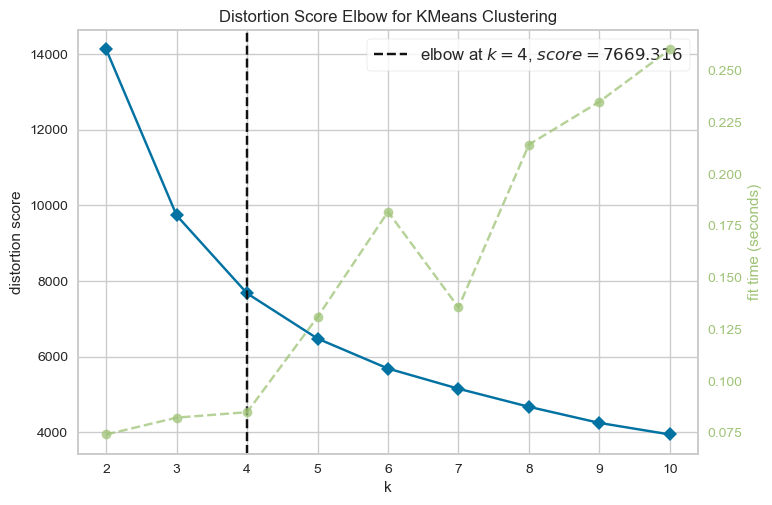

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
#Using the elbow method:
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(PCA_data)
Elbow.show()

The above graph suggests that 4 is the optimal number of clusters for our data.

With the number of clusters determined, now we can move on to **Hierarchical Agglomerative Cluster (HAC)** to get our final clusters.

In [50]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

prediction =  cluster.fit_predict(PCA_data)
PCA_data['Clusters'] = prediction

Having created our clusters, let's now re-plot the 3D scatter plot to visualize what our clusters look like.

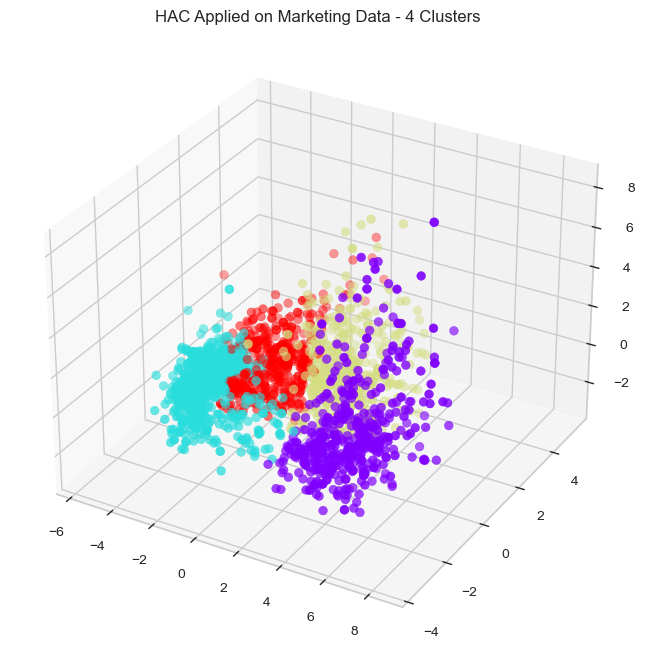

In [51]:
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=PCA_data['Clusters'], marker="o", cmap='rainbow')
plt.title('HAC Applied on Marketing Data - 4 Clusters')
plt.show()

Amazing! Now we can add these clusters back to the original dataset to assess our model and derive cool business insights.

In [52]:
data['Clusters'] = prediction

data.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          0  58138.0        0         0       58       635         88   
1          0  46344.0        1         1       38        11          1   
2          0  71613.0        0         0       26       426         49   
3          0  26646.0        1         0       26        11          4   
4          1  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   Complain  Response       Customer_For  Family_Size  Is_Parent  Age  Spent  \
0         0         1  83894400000000000            1          0   66   1617   
1         0         0  10800000000000000            3          1   69     27   
2         0         0  40780800000000000            2          0   58    776   
3         0         0   5616000000000000            3          1   39     53   
4         0         0  27734400000000000            3          1   42    422   

   Clusters  Total_Promos  
0         0             0  
1         1             0  
2         0             0  
3         1             0  
4         3             0  

[5 rows x 30 columns]

### Model Evaluation
Having created the clusters and plotted them, it is now important to evaluate our model to see how it is. 

There are several ways to do this including:
1) Silhouette Score: The silhouette score measures the similarity of an instance to its own cluster compared to other clusters. A score close to 1 indicates a well-formed cluster.

2) Calinski-Harabasz Index: This index measures the ratio of the between-cluster variance to the within-cluster variance. A high score indicates that the clusters are well separated.

3) Davies-Bouldin Index: The Davies-Bouldin Index calculates the average similarity between each cluster and its most similar cluster. Lower values indicate a better cluster structure.

4) Confusion Matrix: A confusion matrix can be used to evaluate the accuracy of the clustering model by comparing the actual class labels of instances with the predicted class labels.

5) Visualization: The cluster structure can also be visually inspected through plotting the instances and coloring them according to their cluster assignments.

We will start off with **Visualization** and then use the **Silhouette Score**.

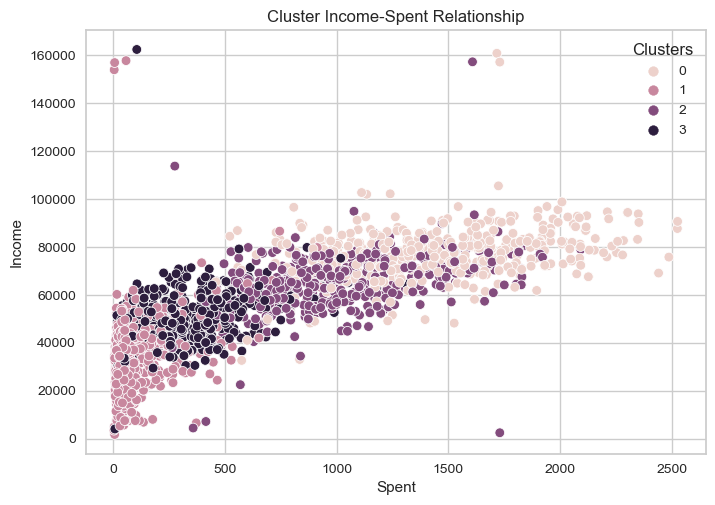

In [53]:
#Let's visualize the Income-Spent relationship for the clusters.
pl = sns.scatterplot(data=data, x=data['Spent'], y=data['Income'], hue=data['Clusters'])
pl.set_title('Cluster Income-Spent Relationship')
plt.show()

The above graph is quite useful in providing informatino on the clusters. We note the following:
1) Cluster 0 customers are in the higher income-spent bracket.
2) Cluster 1 customers are in the low income-spent bracket.
3) Cluster 2 customers are in the medium income-spent bracket.
4) Cluster 3 customers are in the low-medium income-spent bracket.

Next, we can observe the distribution of spend amount per cluster.

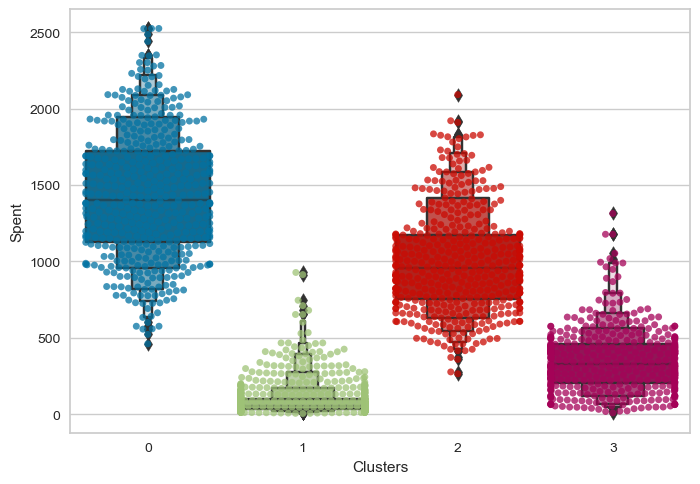

In [54]:
plt.figure()
pl=sns.swarmplot(x=data['Clusters'], y=data['Spent'], alpha=0.75)
pl=sns.boxenplot(x=data['Clusters'], y=data['Spent'])

We can see that cluster 0 has the largest spend distribution, followed by cluster 2. This information is valuable as now we can further analyze clusters 0 and 2 to assess their highest areas of spend to identify targeted marketing strategies.

<Figure size 500x500 with 0 Axes>

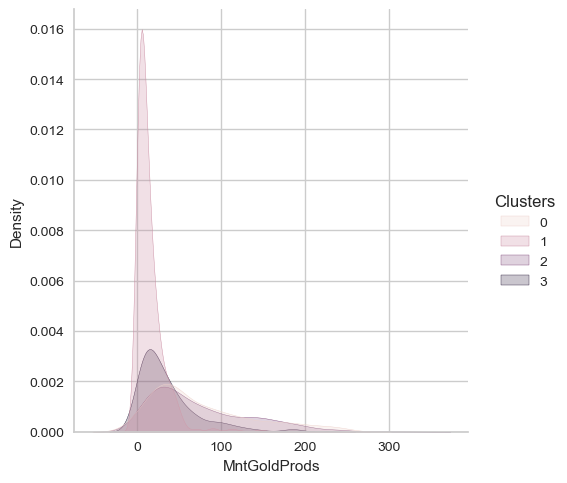

<Figure size 500x500 with 0 Axes>

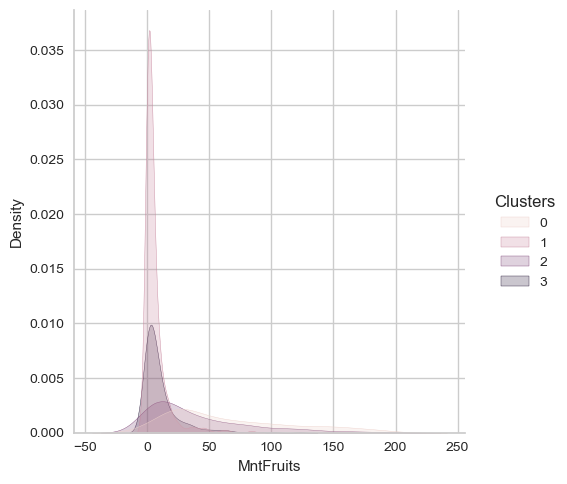

<Figure size 500x500 with 0 Axes>

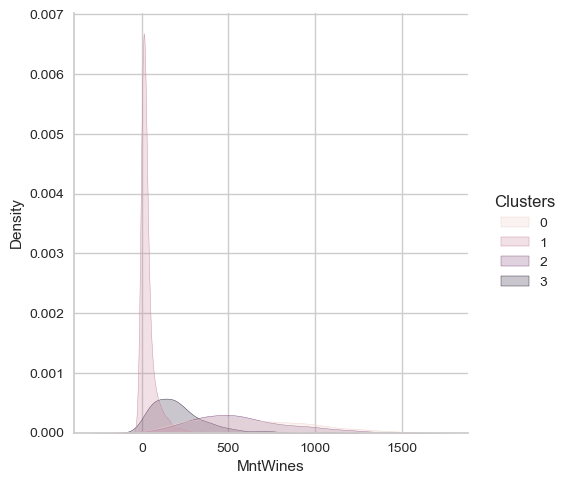

<Figure size 500x500 with 0 Axes>

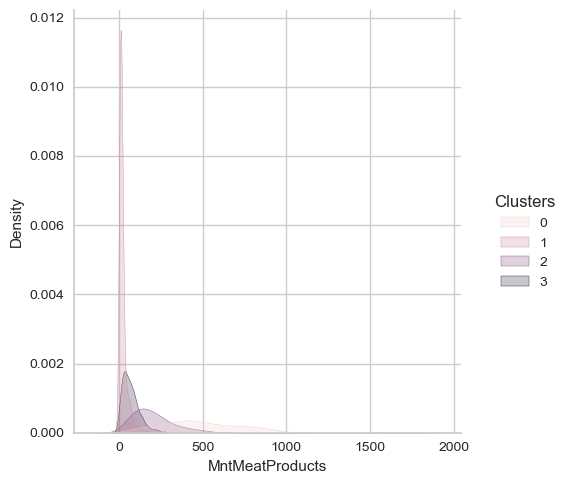

<Figure size 500x500 with 0 Axes>

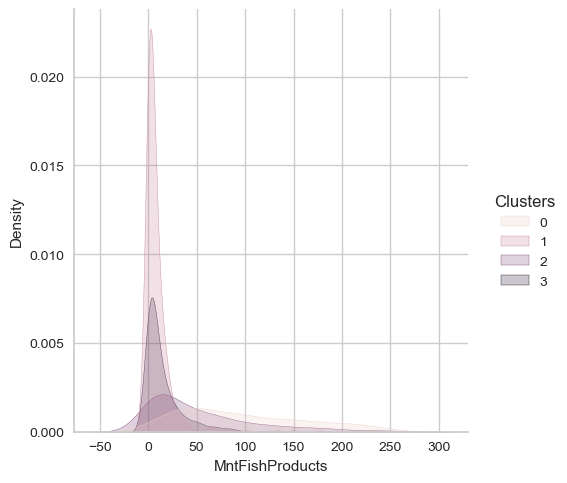

<Figure size 500x500 with 0 Axes>

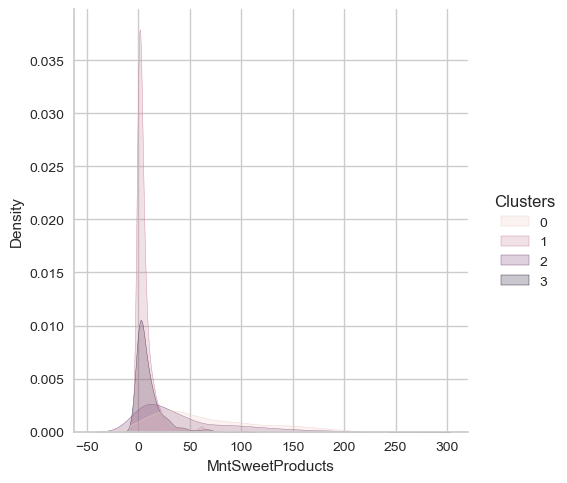

In [55]:
SpentPlot = ['MntGoldProds', 'MntFruits','MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

for i in SpentPlot:
    plt.figure(figsize = (5,5))
    sns.displot(data, x=i, hue='Clusters', kind="kde", fill=True)
    plt.show()

<Figure size 800x550 with 0 Axes>

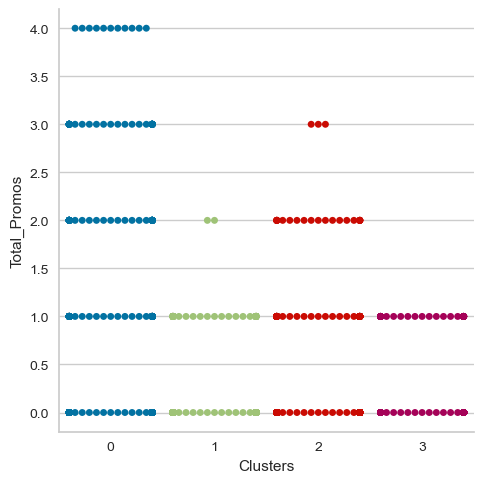

In [56]:
data['Total_Promos'] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

plt.figure()
sns.catplot(data=data, x='Clusters', y='Total_Promos', kind='swarm')
plt.show()

We see that clusters 0 and 2 are most prone to accepting promotions. This is in line with the earlier graph that showed clusters 0 and 2 as the highest spenders. 

Now let's review the responses to the deals offered.

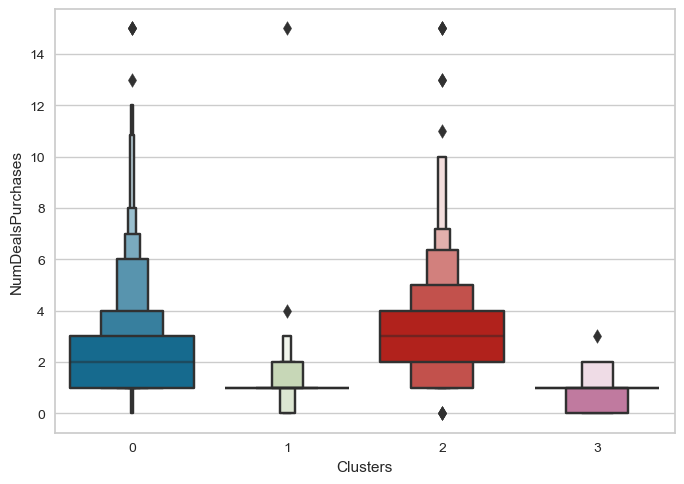

In [33]:
#Plotting the distribution of deal purchases by cluster
plt.figure()
pl=sns.boxenplot(y=data['NumDealsPurchases'], x=data['Clusters'])
plt.show()

Similar to amount spent and promotions acceptnace, deal purchases are also higher for clusters 0 and 2. 

Now, let's evaluate our HAC model by calculating its **Silhouette Score**.

In [58]:
score = silhouette_score(PCA_data, prediction)

print("Silhouette score:", score)

Silhouette score: 0.39666132655597747


Interpetting the **Silhouette Score**: this score is a value between -1 and 1 where a higher score indicates a better cluster. 

A score close to 1 means that the clusters are well separated from each other whereas a score close to 0 means the clusters are near eachother with poorly defined boundaries. Finally, a score of -1 means that the instances in a cluster are far away from other instances within that cluster and much closer to instances in another cluster, indicating poor assignment.

Given our data are dense and highly clustered, a score of 0.40 still indicates a good clustering solution. However, we should note that there is likely some overlap between the clusters. 

Now that we have evaluated our model and understand the some characteristics of our clusters, let's diver deeper into understanding which consumer type comprises each cluster. We can use Seaborn's **Joint Plot** here.

Joint plots can be very useful in visualizing the relationship between two variables alongside their distributions.


<Figure size 800x550 with 0 Axes>

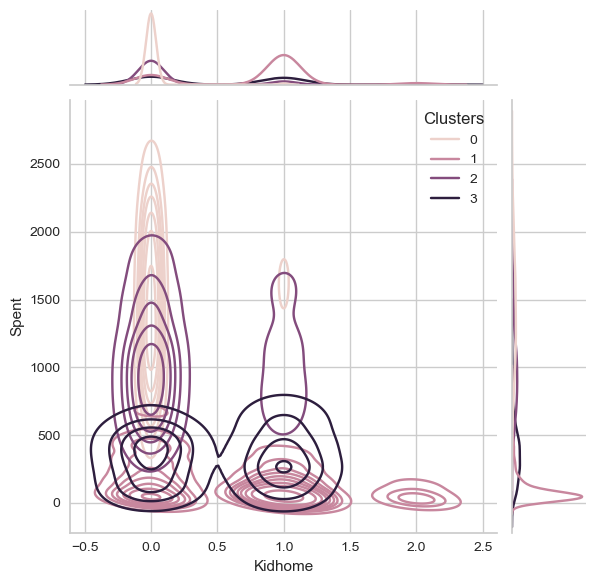

<Figure size 800x550 with 0 Axes>

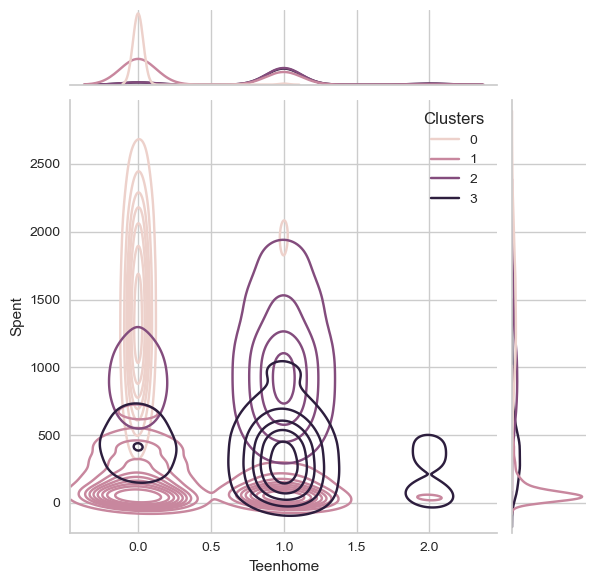

<Figure size 800x550 with 0 Axes>

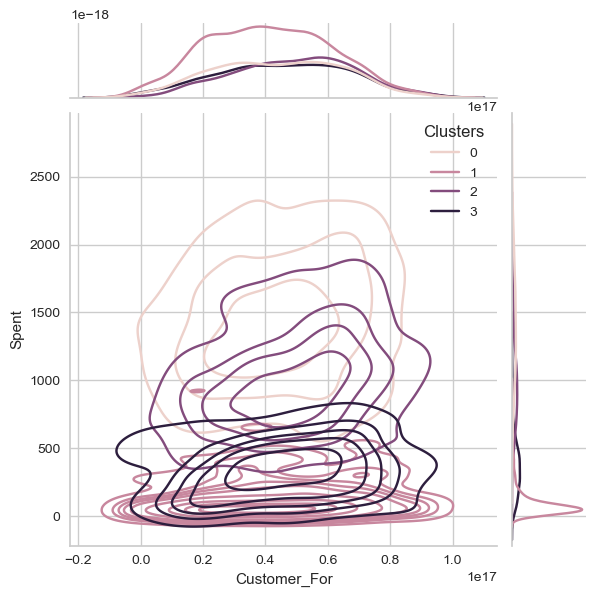

<Figure size 800x550 with 0 Axes>

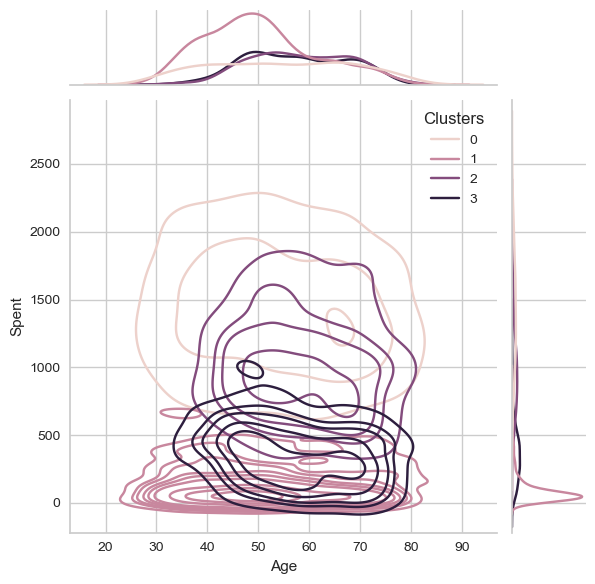

<Figure size 800x550 with 0 Axes>

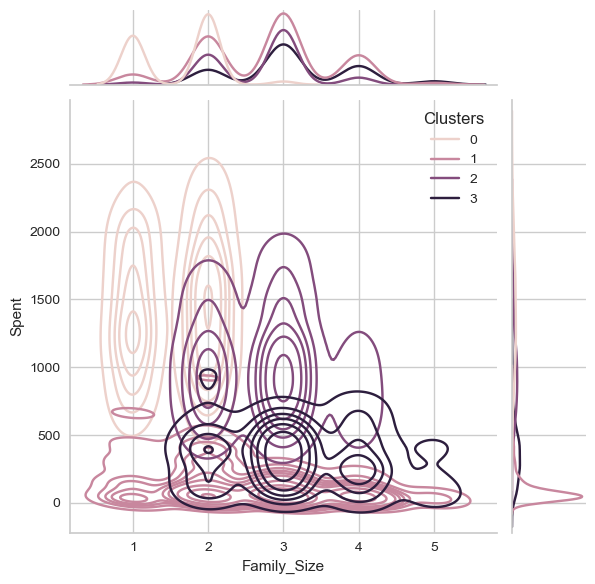

<Figure size 800x550 with 0 Axes>

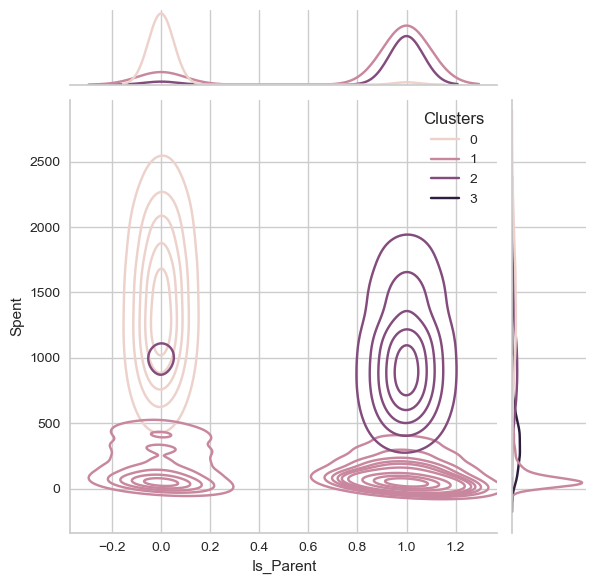

<Figure size 800x550 with 0 Axes>

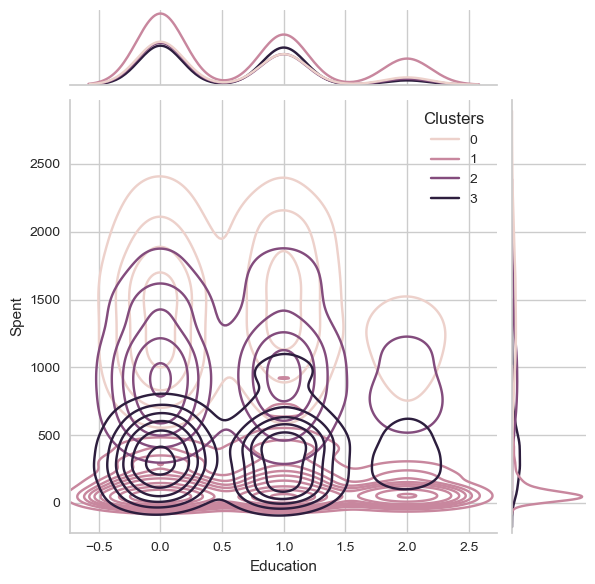

In [60]:
PersonalInfo = [ "Kidhome","Teenhome","Customer_For", "Age", "Family_Size", "Is_Parent", "Education"]

for i in PersonalInfo:
    plt.figure()
    sns.jointplot(x=data[i], y=data['Spent'], hue=data['Clusters'], kind='kde')
    plt.show()

Through the graphs above, we are able to observe the following general information for our clusters:
1) Cluster 0: high spenders, no kids, small family size, middle aged.
2) Cluster 1: low spenders, between 0-2 kids, varying family size with potential for large.
3) Cluster 2: medium spenders, up to 1 kid, medium family size.
4) Cluster 3: low-medium spenders, up to 1 kid, medium family size.

### Conclusion
In this notebook, we first generally reviewed Hierarchical Agglomerative Clustering (HAC) and applied its various methods to artifical data. 

Next, we brought in a real-world consumer data to apply HAC on in order to derive insights into potential customer types. Like all real data, we first had to clean and prepare it for analysis which was then followed by clustering consumers into 4 distinct groups. These clusters can now be used for a variety of business needs such as targetted marketing.